In [11]:
import scipy.io
import numpy as np
from keras.utils import np_utils
import matplotlib.pyplot as plt
import sys
import pickle

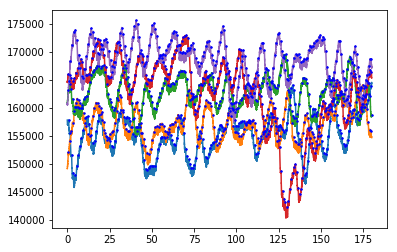

In [12]:
rec_fs = 512
rec_subj_name = "sub01"

test_pickle = pickle.load(open(str(rec_subj_name) + ".p", "rb"))

experiment = "ex_paced"

for ex in ["10bpm","12bpm", "15bpm", "18bpm", "20bpm"]: plt.plot(test_pickle[experiment][ex]["earlobe-wrist"]["earlobe"]["t"],
test_pickle[experiment][ex]["earlobe-wrist"]["earlobe"]["ppg_g"])
    
for ex in ["10bpm","12bpm", "15bpm", "18bpm", "20bpm"]:
    pks = test_pickle[experiment][ex]["earlobe-wrist"]["earlobe"]["pks_g"]
    if len(pks) != 0:
        plt.plot(pks[1], pks[2], color='blue', linestyle='None', marker='o', markersize=1.5, alpha=1.0)

In [14]:
ppg_g1 = np.asarray(test_pickle[experiment]["12bpm"]["earlobe-wrist"]["earlobe"]["ppg_g"])
t = np.asarray(test_pickle[experiment]["12bpm"]["earlobe-wrist"]["earlobe"]["t"])
ppg_g = (np.vstack((ppg_g1,t)).T)

acc_X1 = np.asarray(test_pickle[experiment]["12bpm"]["earlobe-wrist"]["earlobe"]["acc_x"])
acc_X = (np.vstack((acc_X1,t)).T)
acc_Y1 = np.asarray(test_pickle[experiment]["12bpm"]["earlobe-wrist"]["earlobe"]["acc_y"])
acc_Y = (np.vstack((acc_Y1,t)).T)
acc_Z1 = np.asarray(test_pickle[experiment]["12bpm"]["earlobe-wrist"]["earlobe"]["acc_z"])
acc_Z = (np.vstack((acc_Z1,t)).T)

peaks = np.asarray(test_pickle[experiment]["12bpm"]["earlobe-wrist"]["earlobe"]["pks_g"][1:])
peaks = np.transpose(peaks)
peak_points = peaks[:,0]

data1 = np.concatenate((ppg_g, acc_X), axis=1)
data2 = np.concatenate((data1, acc_Y), axis=1)
data3 = np.concatenate((data2, acc_Z), axis=1)

data = data3[:,[0,1,2,4,6]]


In [15]:
output = []
for value in t :
        if value in peak_points:
            output.append(1)
        else:
            output.append(0)

output = np.asarray(output)

output = output.reshape(output.shape[0],1)


In [ ]:
predicted_peak_points = []
for value in output :
        if value =1:
            predicted_peak_points.append(t)
        

In [16]:

from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Flatten
model = Sequential()
model.add(Dense(64, input_dim=5, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [17]:
model.fit(data, output,
          epochs=20,
          batch_size=128)

Epoch 1/20
92160/92160 [==============================] - 2s 21us/step - loss: 1.8265 - acc: 0.8854
Epoch 2/20
92160/92160 [==============================] - 2s 17us/step - loss: 0.4044 - acc: 0.9746
Epoch 3/20
92160/92160 [==============================] - 2s 17us/step - loss: 0.2493 - acc: 0.9844
Epoch 4/20
92160/92160 [==============================] - 2s 17us/step - loss: 0.1752 - acc: 0.9890
Epoch 5/20
92160/92160 [==============================] - 2s 17us/step - loss: 0.1293 - acc: 0.9919
Epoch 6/20
92160/92160 [==============================] - 2s 17us/step - loss: 0.1139 - acc: 0.9929
Epoch 7/20
92160/92160 [==============================] - 2s 17us/step - loss: 0.0915 - acc: 0.9943
Epoch 8/20
92160/92160 [==============================] - 2s 18us/step - loss: 0.0727 - acc: 0.9955
Epoch 9/20
92160/92160 [==============================] - 2s 17us/step - loss: 0.0664 - acc: 0.9959
Epoch 10/20
92160/92160 [==============================] - 2s 17us/step - loss: 0.0604 - acc: 0.9962